# Horizontal Averages of Rayleigh-Taylor

Here we show how to do a lateral / horizonal average of the compressible Rayleigh-Taylor
simulation to see what the average vertical profile of the mixing looks like.

In [1]:
from pyro import Pyro

First we'll run the `rt` problem using the problem defaults.

In [2]:
p = Pyro("compressible")
p.initialize_problem("rt")
p.run_sim()

/opt/hostedtoolcache/Python/3.11.11/x64/lib/python3.11/site-packages/pyro/compressible/problems/rt.py:71: RuntimeWarning: invalid value encountered in divide
  0.5*(xmom[:, :]**2 + ymom[:, :]**2)/dens[:, :]


Now we'll get the density variable and use `np.average()` to compute the average in the x-direction.
Note that we operate only on the valid data (`dens.v()`).

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dens = p.get_var("density")
dens_avg = np.average(dens.v(), axis=0)

Finally, we can plot the profile.

Text(0, 0.5, 'average density')

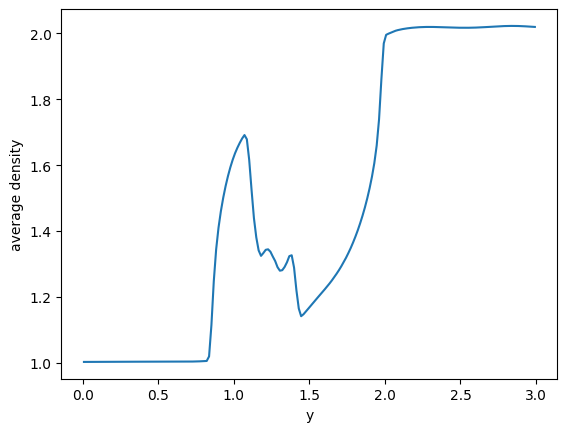

In [5]:
fig, ax = plt.subplots()
g = dens.g
ax.plot(g.y[g.jlo:g.jhi+1], dens_avg)
ax.set_xlabel("y")
ax.set_ylabel("average density")